In [1]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# [3차] 자동완성

- 프로그래머스 **문자열 검색** 문제
- 링크: https://programmers.co.kr/learn/courses/30/lessons/17685
- 2018 카카오 신입 공채 3차 코딩테스트, 34.07% 정답률 https://tech.kakao.com/2017/11/14/kakao-blind-recruitment-round-3/ 

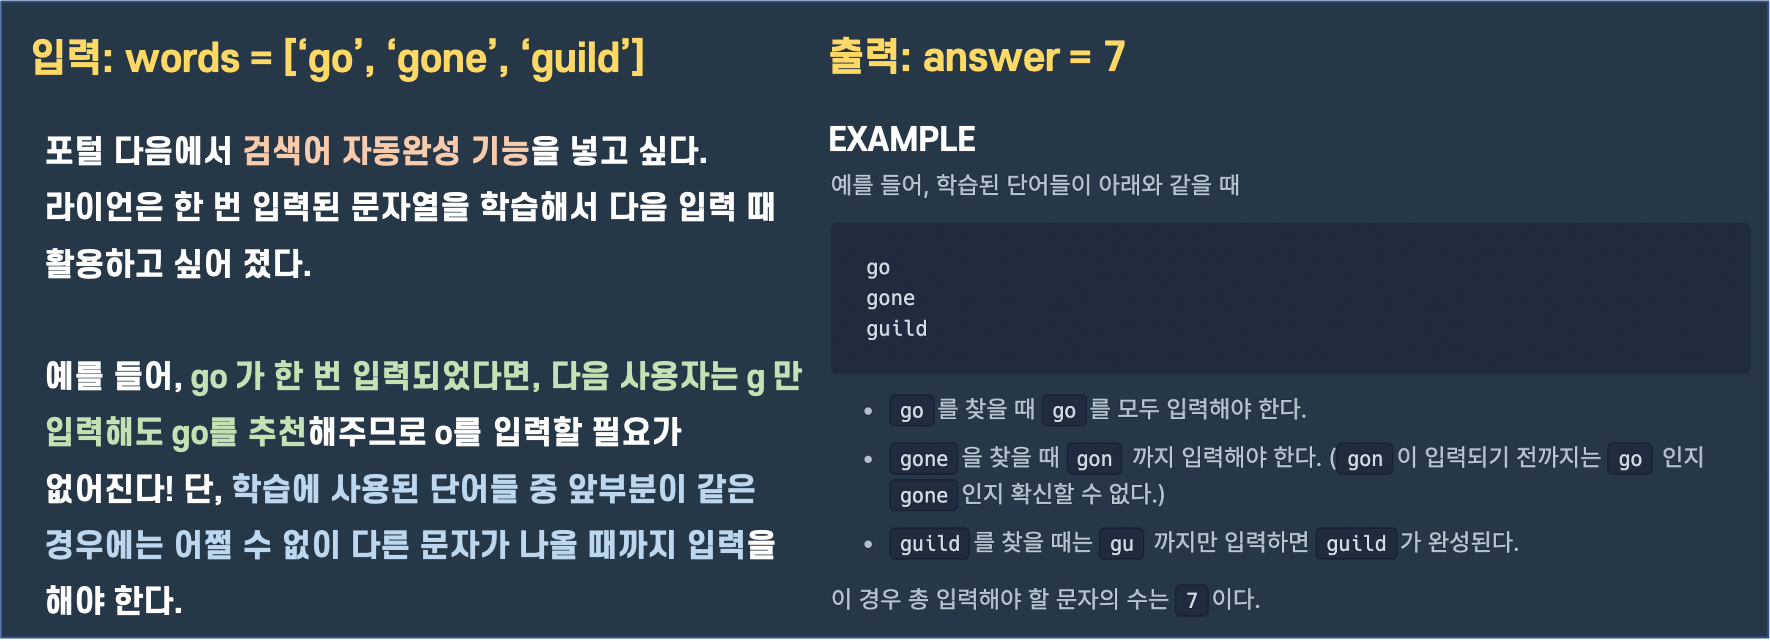

In [2]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/6-summary.png", height=400)

### 문제 설명

-

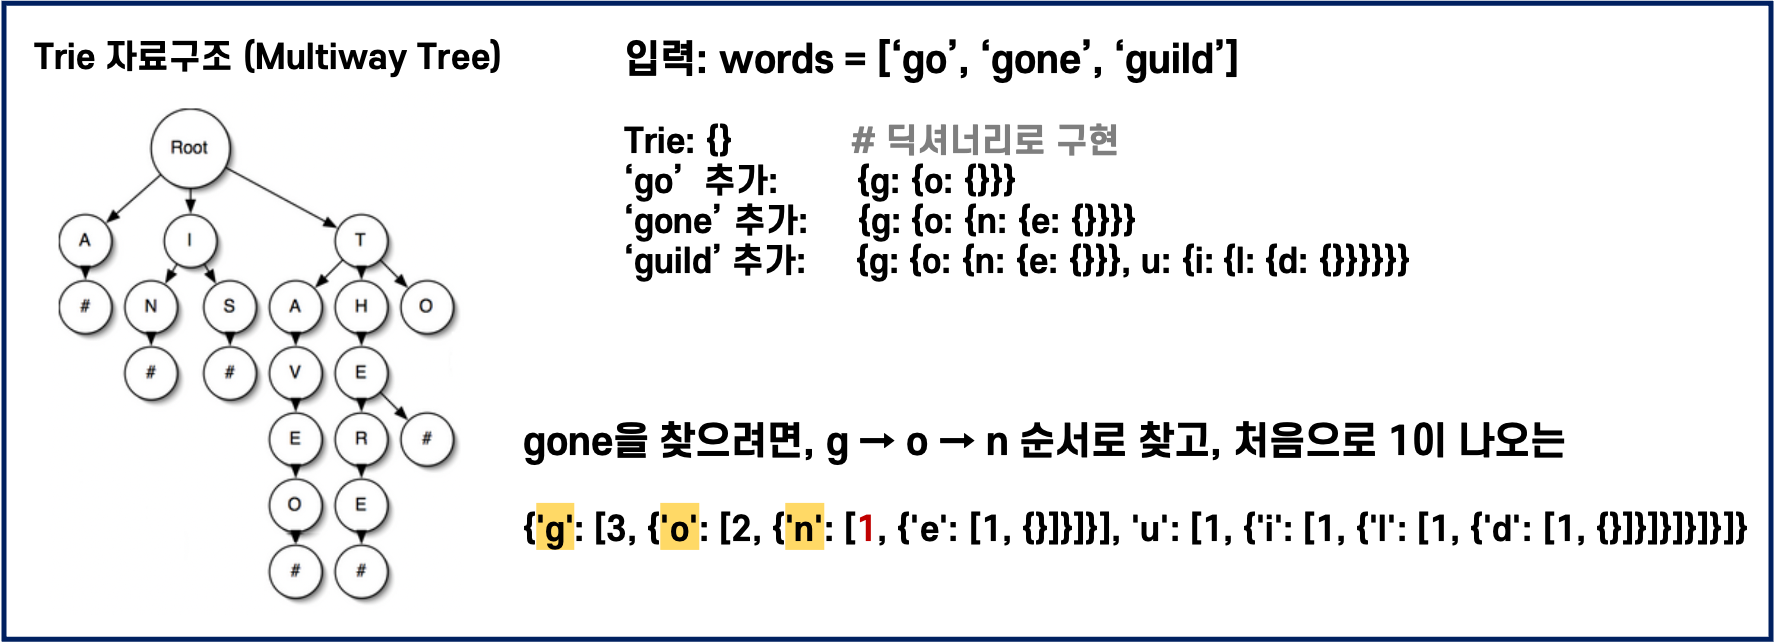

In [3]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/6-summary2.png", height=400)

<br>
<br>
<br>





# Trie 자료구조
<br>


In [106]:
Trie = {}
cur_Trie = Trie

In [107]:
for w in 'go':
    cur_Trie.setdefault(w,[0,{}]) # 키(w)값이 있으면 그냥 키 값 반환, 키(w)값이 없으면 [0, {}]으로 세팅
    cur_Trie[w][0] += 1         # Trie를 만들면서 하위 노드가 추가될 때 +1
    cur_Trie = cur_Trie[w][1] # 계속 연결되도록, 참조
    print('Current Trie:', cur_Trie, ',    Trie:', Trie); print(' ')

Current Trie: {} ,    Trie: {'g': [1, {}]}
 
Current Trie: {} ,    Trie: {'g': [1, {'o': [1, {}]}]}
 


In [115]:
Trie = {}
for word in words:
    cur_Trie = Trie
    for w in word:
        cur_Trie.setdefault(w,[0,{}]) # 키(w)값이 있으면 그냥 키 값 반환, 키(w)값이 없으면 [0, {}]으로 세팅
        cur_Trie[w][0] += 1         # Trie를 만들면서 하위 노드가 추가될 때 +1
        cur_Trie = cur_Trie[w][1] # 계속 연결되도록, 참조

    print('Current Trie:', cur_Trie, ',    Trie:', Trie); print(' ')

Current Trie: {} ,    Trie: {'g': [1, {'o': [1, {}]}]}
 
Current Trie: {} ,    Trie: {'g': [2, {'o': [2, {'n': [1, {'e': [1, {}]}]}]}]}
 
Current Trie: {} ,    Trie: {'g': [3, {'o': [2, {'n': [1, {'e': [1, {}]}]}], 'u': [1, {'i': [1, {'l': [1, {'d': [1, {}]}]}]}]}]}
 


<br>
<br>
<br>





# 문제풀이
<br>

* Trie 구조 이용

In [44]:
def solution(words):

    # Trie를 dictionary 형태로 생성
    Trie = {}
    for word in words:
        cur_Trie = Trie
        for w in word:
            cur_Trie.setdefault(w,[0,{}])
            cur_Trie[w][0] +=1               
            cur_Trie = cur_Trie[w][1]
    
    # Trie를 탐색하다가 하위트리가 한개이면 결과에 추가
    answer = 0
    for word in words: # 모든 단어에 대해
        cur_Trie = Trie

        for i in range(len(word)): # DFS로 탐색하며 문자에 대해 확인
            if cur_Trie[word[i]][0] == 1 :   
                break
            cur_Trie = cur_Trie[word[i]][1]
        answer += i+1
    return answer

In [45]:
words = ['go', 'gone', 'guild']
solution(words)

7

In [46]:
words = ['abc', 'def', 'ghi', 'jklm']
solution(words)

4

In [47]:
words = ['word', 'war', 'warrior', 'world']
solution(words)

15

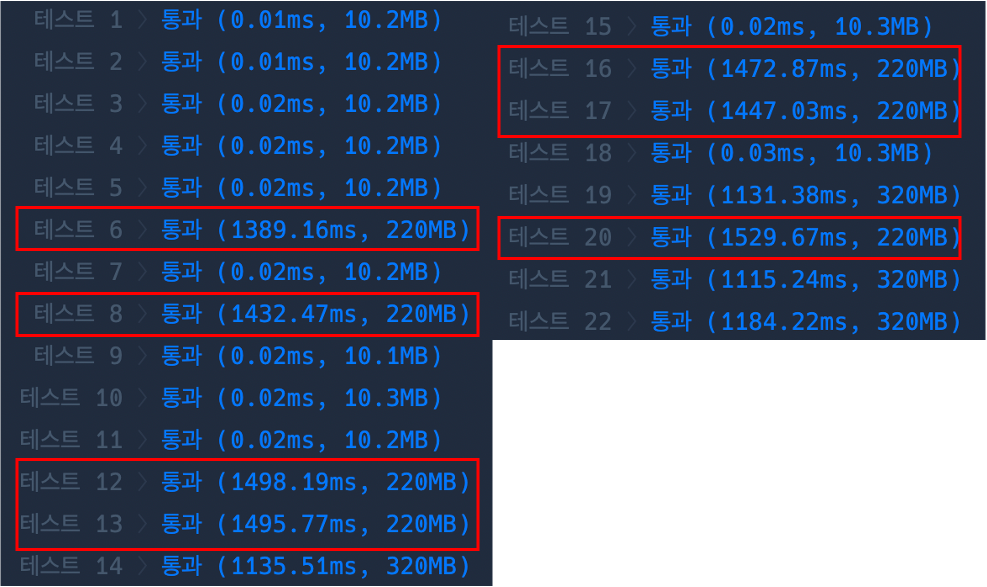

In [69]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/6-success.png", height=350)

<br>
<br>
<br>





# 다른 풀이
<br>

* DFS의 반복을 이용한 풀이
* word_list에서 현재 단어와 지금까지의 상위 노드가 모두 같은 단어만 남겨두기
* DFS, 재귀적으로 호출, 종료 조건은 1. *를 만나거나, 2. word_list에 현재 노드만 남아있을 때
* 각 단어에 대해 트리를 만드는 것과 사실 마찬가지 => 따라서 느림 (Trie구조는 하나의 트리에서 찾는 구조)


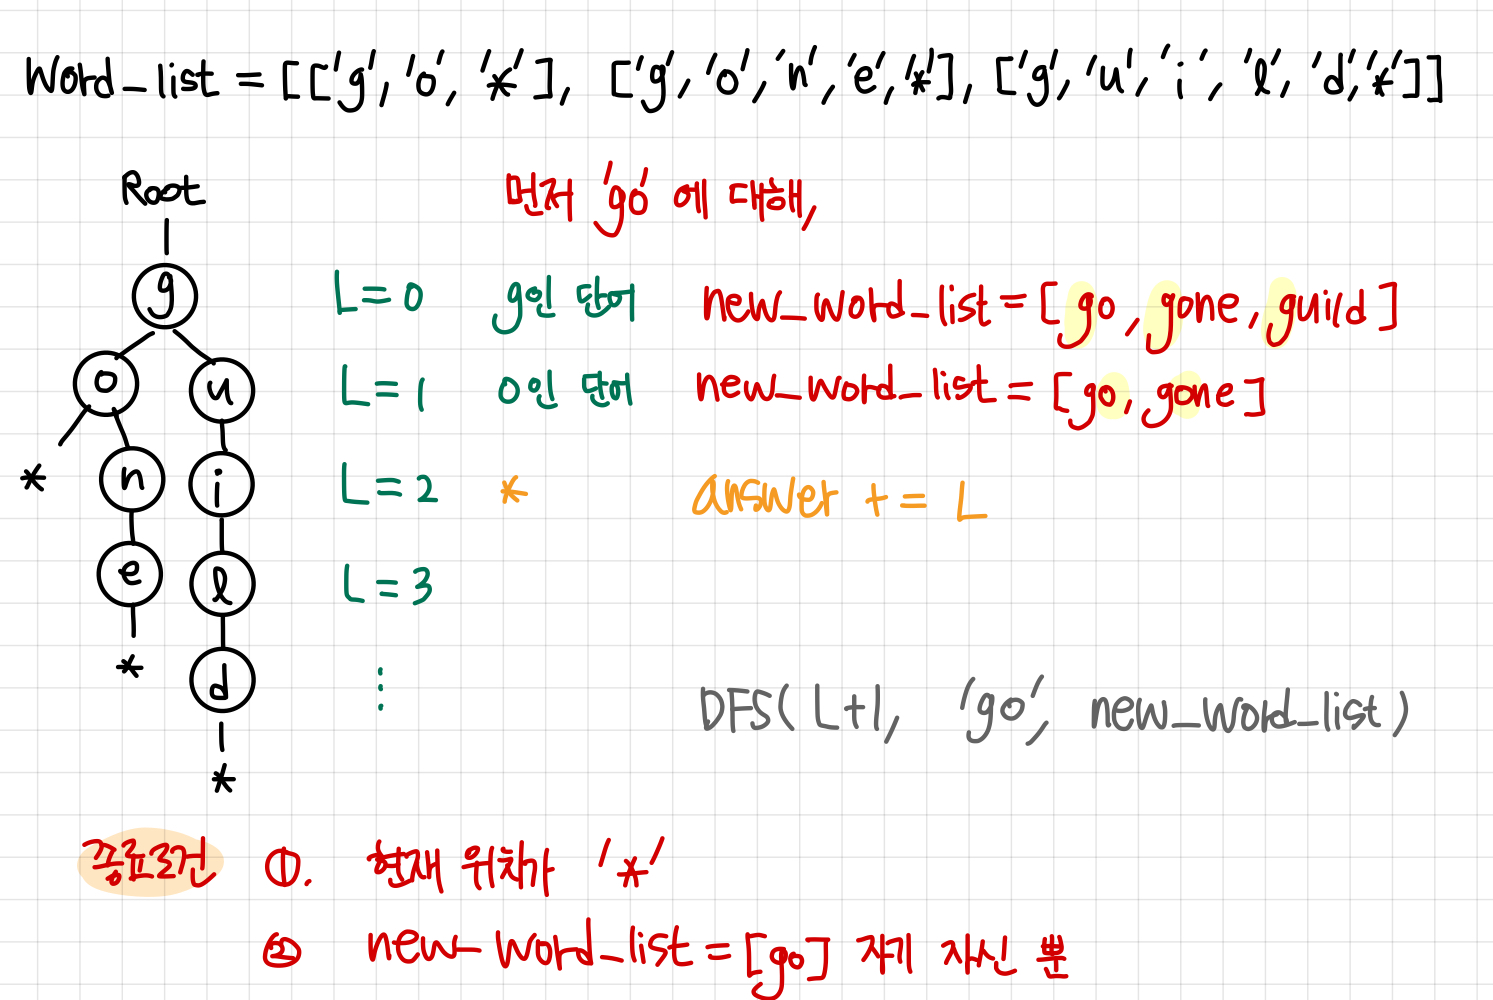

In [63]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/6-summary3.jpeg", height=400)

In [66]:
def DFS(L, cur_w, search_list):
    global answer
    new_search_list = []
    if cur_w[L] == '*': # 1. *, Terminal 노드일 때
        answer += L
        print('입력해야되는 문자 수: ', L)
        return
    if len(search_list) == 1: # 2. 자기 자신만 남았을 때
        answer += L
        print('입력해야되는 문자 수: ', L)
        return
    else:
        for node in search_list:
            if len(node) > L:
                if cur_w[L] == node[L]: # L까지 부모가 같은 노드
                    new_search_list.append(node)
        print(new_search_list)

        DFS(L+1, cur_w, new_search_list)


if __name__ == "__main__":
    words = ['go', 'gone', 'guild']
    answer = 0
    word_list = []

    # * 붙이고, 문자 단위로 나누기
    for word in words:
        word_list.append(list(word)+['*'])

    # 각 단어에 대해 DFS 수행
    for cur_w in word_list:
        print('currunt word: ', ''.join(cur_w))
        DFS(0, cur_w, word_list)
        print(' ')

    print('Total Answer', answer)

# go는 1번 종료 조건에 의해, gone, guild는 2번 종료 조건에 의해

currunt word:  go*
[['g', 'o', '*'], ['g', 'o', 'n', 'e', '*'], ['g', 'u', 'i', 'l', 'd', '*']]
[['g', 'o', '*'], ['g', 'o', 'n', 'e', '*']]
입력해야되는 문자 수:  2
 
currunt word:  gone*
[['g', 'o', '*'], ['g', 'o', 'n', 'e', '*'], ['g', 'u', 'i', 'l', 'd', '*']]
[['g', 'o', '*'], ['g', 'o', 'n', 'e', '*']]
[['g', 'o', 'n', 'e', '*']]
입력해야되는 문자 수:  3
 
currunt word:  guild*
[['g', 'o', '*'], ['g', 'o', 'n', 'e', '*'], ['g', 'u', 'i', 'l', 'd', '*']]
[['g', 'u', 'i', 'l', 'd', '*']]
입력해야되는 문자 수:  2
 
Total Answer 7


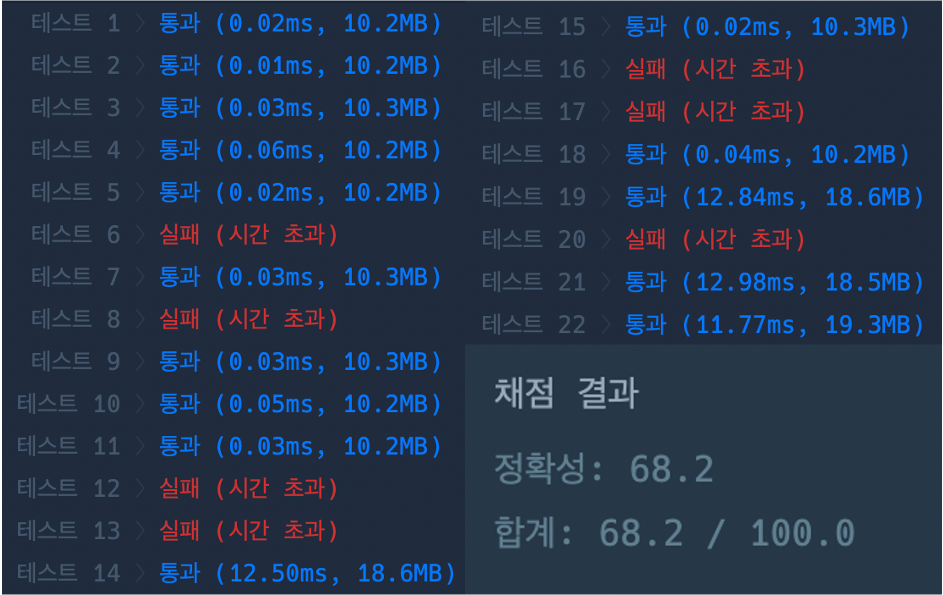

In [57]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/6-failure.png", height=350)